In [5]:
import numpy as np
import matplotlib.pyplot as plt

import soundfile as sf

def align_rir(ir, fs, total_s=4):
    n0 = np.min(np.argmax(np.abs(ir), axis=0)) if ir.ndim > 1 else np.argmax(np.abs(ir))
    out = ir[n0:]
    tgt = int(total_s * fs)
    if len(out) >= tgt:
        out = out[:tgt]
    else:
        pad = tgt - len(out)
        out = np.pad(out, ((0, pad),) if out.ndim == 1 else ((0, pad), (0, 0)))
    return out, n0

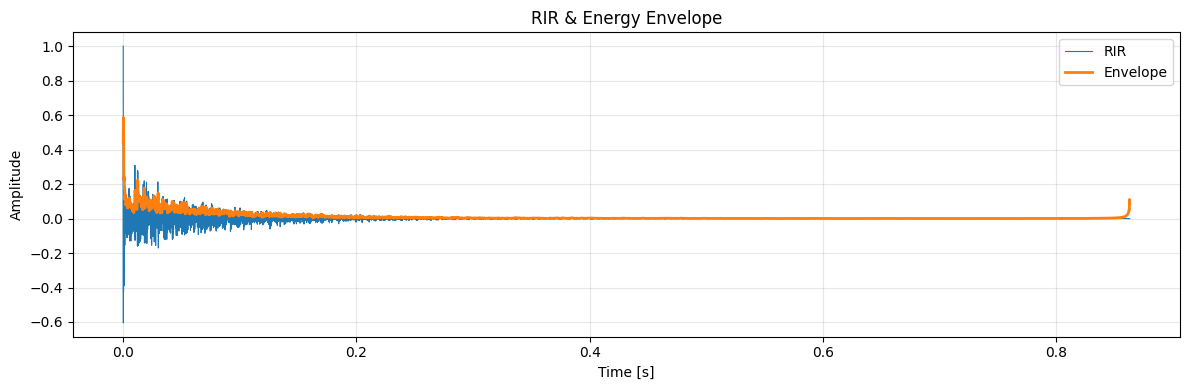

In [9]:
import numpy as np
import soundfile as sf
import matplotlib.pyplot as plt
from scipy.signal import hilbert

# ---------- helper: max-point alignment ----------
def align_rir_max(ir):
    n0 = int(np.argmax(np.abs(ir)))
    return ir[n0:], n0

# ---------- load & align ----------
rir_path = "RIRS_NOISES/real_rirs_isotropic_noises/" \
           "RVB2014_type1_rir_largeroom1_far_angla.wav"
sig, fs   = sf.read(rir_path)          # stereo → take L
sig       = sig[:, 0]
aligned, n0 = align_rir_max(sig)

# ---------- energy envelope ----------
env = np.abs(hilbert(aligned))         # amplitude envelope
# optional smoothing (0.5 ms)
win = max(1, int(0.0005*fs))
env = np.convolve(env, np.ones(win)/win, mode='same')

# ---------- plot ----------
t = np.arange(len(aligned)) / fs
plt.figure(figsize=(12,4))
plt.plot(t, aligned, lw=0.8, label='RIR')
plt.plot(t, env,      lw=2.0, label='Envelope')
plt.xlabel('Time [s]'); plt.ylabel('Amplitude')
plt.title('RIR & Energy Envelope')
plt.legend(); plt.grid(alpha=.3); plt.tight_layout()
plt.show()
